# Orlicz functions

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/DyonOylloug/numerical_function_spaces/HEAD?labpath=docs%2FOrlicz_functions.ipynb) - link to interactive notebooks session.

A map $\Phi :\mathbb{R}\rightarrow \left[ 0,\infty \right]$ is said to be an
    *Orlicz function* if it is even, convex, left continuous on the whole
    $\mathbb{R}_{+},$ $\Phi (0)=0$ and $\Phi $ is not identically equal to zero.
    Since $\Phi $ is even, without loss of generality we often consider $\Phi $
    with the domain restricted to the interval $\left[ 0,\infty \right) .$ It
    follows that every Orlicz function $\Phi $ is non-decreasing on $\mathbb{R}%
    _{+}.$ In this paper, because $\Phi$ is even, we will always define Orlicz function for $u\geq 0.$

We will use two types of definitions of the Orlicz functions. Both work with numpy arrays as arguments and return numpy arrays.

In [20]:
import numpy as np
import numerical_function_spaces.orlicz_spaces as osm

Simplest Orlicz function

In [21]:
def Orlicz_function(u):
    return u ** 2

Above definition works for floats and numpy arrays

In [22]:
print(Orlicz_function(2))

4


In [23]:
u = np.arange(0, 10, 0.5)
print(u)
print(Orlicz_function(u))

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
[ 0.    0.25  1.    2.25  4.    6.25  9.   12.25 16.   20.25 25.   30.25
 36.   42.25 49.   56.25 64.   72.25 81.   90.25]


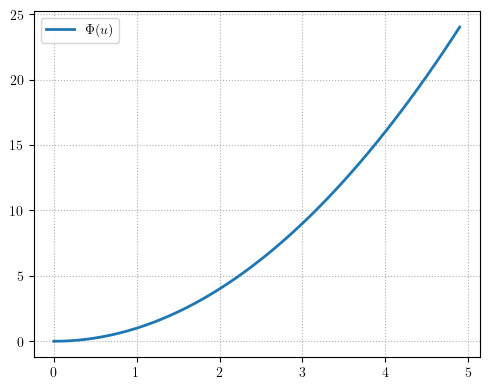

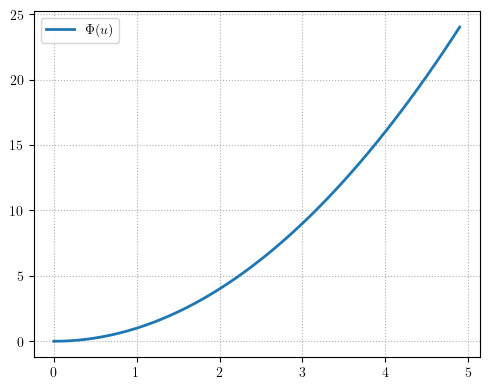

In [24]:
osm.plot_Phi(Orlicz_function, u_max=5, du=0.1)

In [25]:
def Orlicz_function(u):
    return np.where(u <= 1, 0, u - 1)

Above definition also works for floats and numpy arrays

In [26]:
print(Orlicz_function(2))

1


In [27]:
u = np.arange(0, 10, 0.5)
print(u)
print(Orlicz_function(u))

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
[0.  0.  0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5
 8.  8.5]


The same function for numpy array we may defined as

In [28]:
def Orlicz_function(u):
    """
    'u' should be a numpy array or function must be a little complicated
    """
    Phi = np.zeros(len(u))
    for i in range(len(u)):
        if u[i] <= 1:
            Phi[i] = 0
        else:
            Phi[i] = u[i] - 1
    return Phi

Such defined function doesn't work for a number

In [29]:
try:
    Orlicz_function(2)
except Exception as error:
    print("An error occurred:", error)

An error occurred: object of type 'int' has no len()


But works for numpy array

In [30]:
u = np.arange(0, 10, 0.5)
print(u)
print(Orlicz_function(u))

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
[0.  0.  0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5
 8.  8.5]


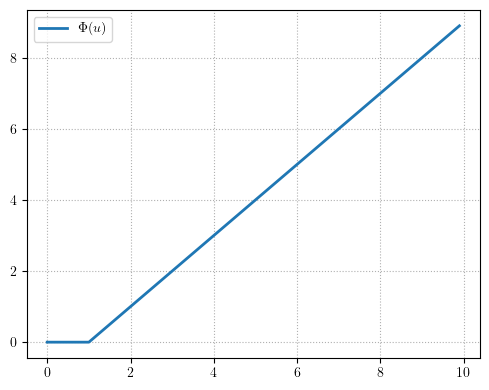

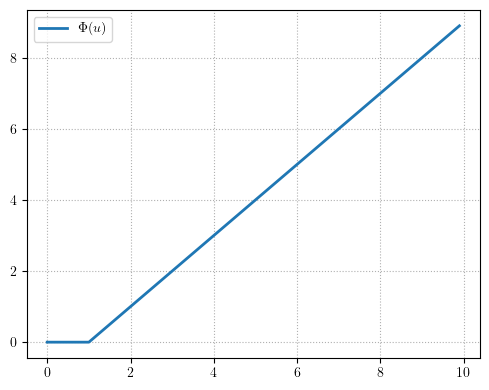

In [31]:
osm.plot_Phi(Orlicz_function, u_max=10, du=0.1)

Another examples of Orlicz functions

In [32]:
def Orlicz_function(u):
    return np.where(u <= 1, 0, np.where(u <= 2, u - 1, u ** 2 - 3))

The same function for numpy array we may defined as

In [33]:
def Orlicz_function(u):
    Phi = np.zeros(len(u))
    for i in range(len(u)):
        if u[i] <= 1:
            Phi[i] = 0
        elif u[i] <= 2:
            Phi[i] = u[i] - 1
        else:
            Phi[i] = (u[i]) ** 2 - 3
    return Phi

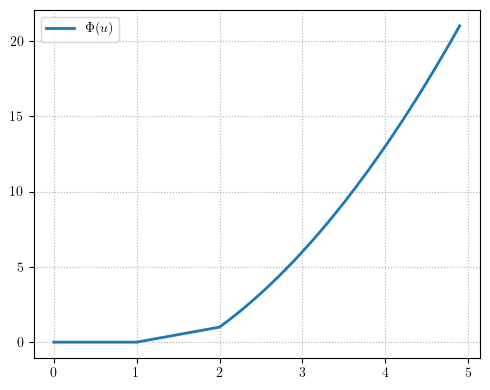

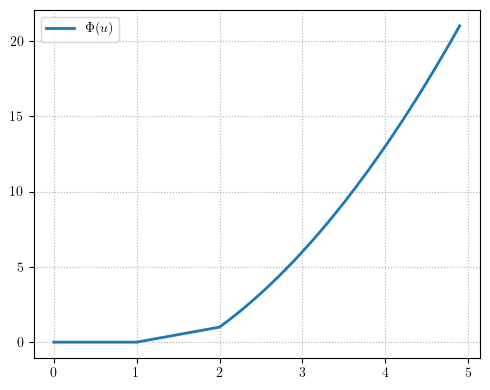

In [34]:
osm.plot_Phi(Orlicz_function, u_max=5, du=0.1)

In [35]:
def Orlicz_function(u):
    # return np.where(u <= 1, u, np.inf)
    # or 
    Phi = np.zeros(len(u))
    for i in range(len(u)):
        if u[i] <= 1:
            Phi[i] = u[i]
        else:
            Phi[i] = np.inf
    return Phi

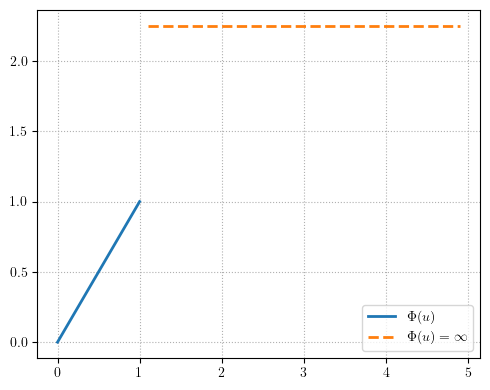

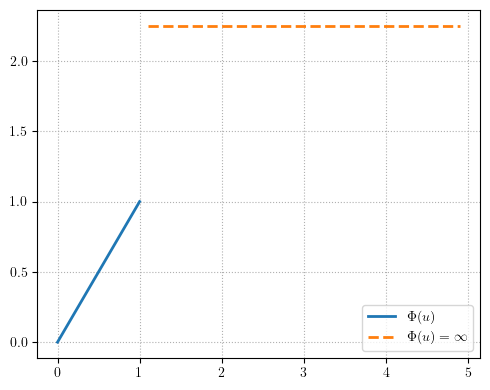

In [36]:
osm.plot_Phi(Orlicz_function, u_max=5, du=0.1)

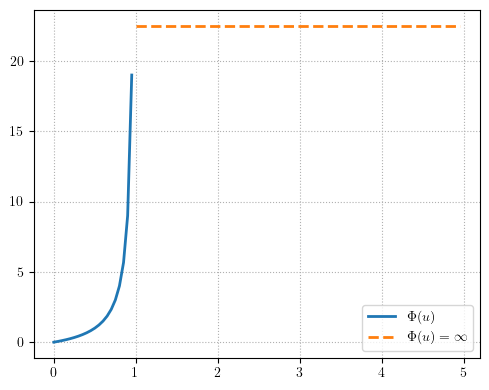

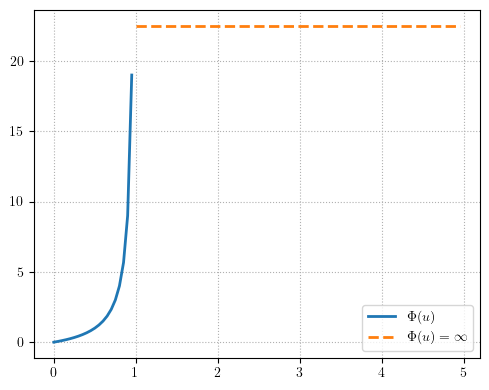

In [37]:
def Orlicz_function(u):
    # return np.where(u <= 1, u / (1 - u), np.inf)
    # or 
    Phi = np.zeros(len(u))
    for i in range(len(u)):
        if u[i] < 1:
            Phi[i] = u[i] / (1 - u[i])
        else:
            Phi[i] = np.inf
    return Phi

osm.plot_Phi(Orlicz_function, u_max=5, du=0.05)

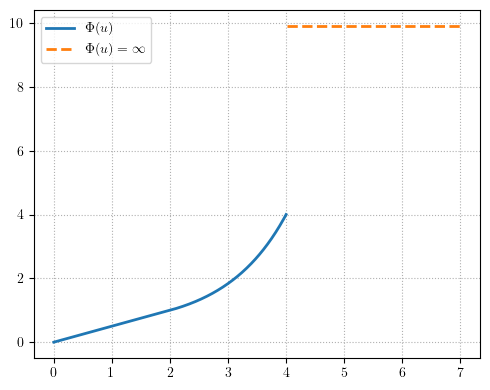

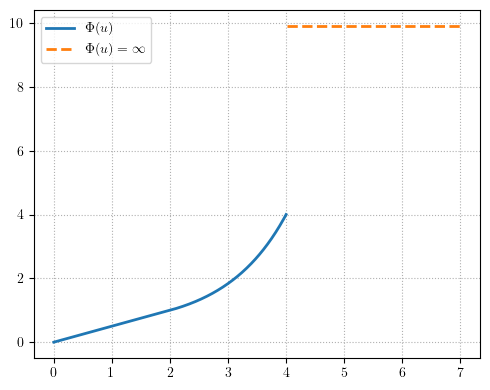

In [38]:
def Orlicz_function(u):
    # return np.where(u <= 2, u / 2, np.where(u <= 4, (u / 2) ** (u / 2), np.inf))
    # or
    Phi = np.zeros(len(u))
    for i in range(len(u)):
        if u[i] <= 2:
            Phi[i] = u[i] / 2
        elif u[i] <= 4:
            Phi[i] = (u[i] / 2) ** (u[i] / 2)
        else:
            Phi[i] = np.inf
    return Phi

osm.plot_Phi(Orlicz_function, u_max=7, du=0.01)

More complicated examples

In [39]:
def Orlicz_function(u):
    Phi = np.zeros(len(u))
    for i in range(len(u)):
        n = -1
        while True:
            if u[i] > n and u[i] <= n + 1:  # below two conjugated functions?
                Phi[i] = (n + 1) * u[i] - (n + 1) * n / 2
                # Phi[i] = n * u[i] - (n) * (n + 1) / 2
                break
            n = n + 1
    return Phi

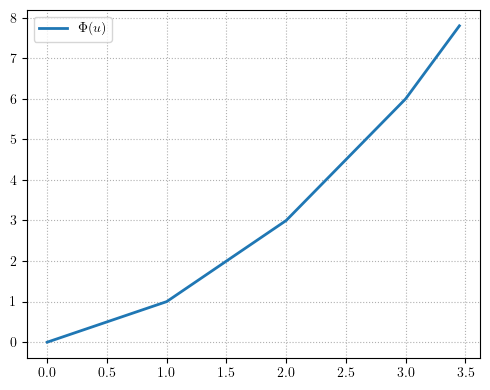

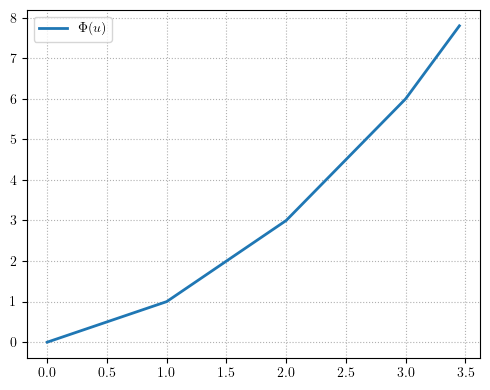

In [40]:
osm.plot_Phi(Orlicz_function, u_max=3.5, du=0.05)

In [41]:
def Orlicz_function(u):
    Phi = np.zeros(len(u))
    for i in range(len(u)):
        n = -1
        while True:
            if u[i] > n and u[i] <= n + 1:  # below two conjugated functions?
                # Phi[i] = (n + 1) * u[i] - (n + 1) * n / 2
                Phi[i] = n * u[i] - (n) * (n + 1) / 2
                break
            n = n + 1
    return Phi

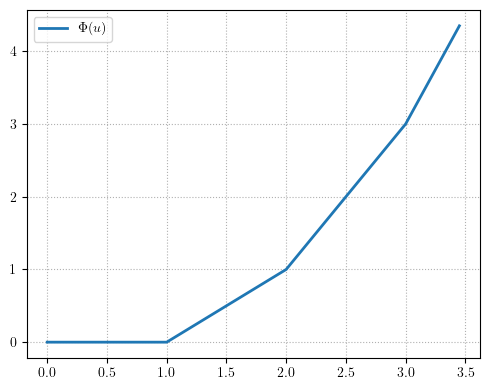

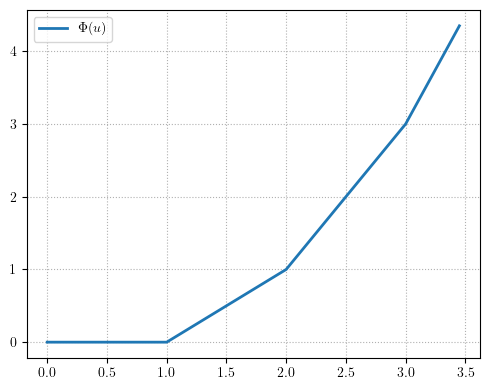

In [42]:
osm.plot_Phi(Orlicz_function, u_max=3.5, du=0.05)